# PreProcessing Data

# Data Exploration

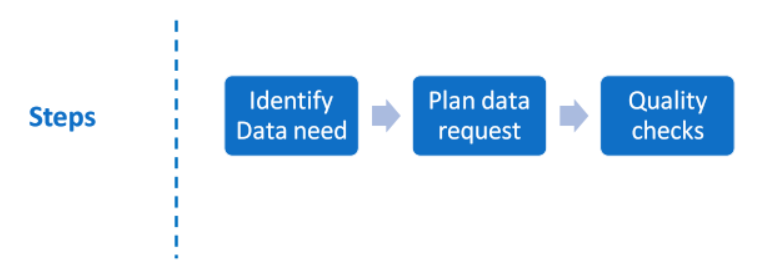

Setelah melakukan eksplorasi data kemudian dilakukan pengecekan atribut (Raw Data Analysis). Selanjutnya melakukan Univariate Analysis, yaitu melakukan perhitungan ukuran pemusatan serta penyebaran data.

Setelah kedua hal diatas dilakukan kemudian, dilakukan proses pembersihan data (Cleaning data). Proses pembersihan data dilakukan sesuai dengan kebutuhan data, namun secara umum pembersihan data dilakukan dengan
* Missing Value
* Outlier
* Labelling
* Transformasi Data
* Normalisasi Data
* Reduksi Dimensi
* Seleksi fitur (Feature Selection)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import data menggunakan seaborn
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
#Menampilkan dataset pada library seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
# menampilkan deskripsi data
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#Menampilkan info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
#Menampilkan mean dari data
data['age'].mean()

29.69911764705882

In [6]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,177,19.865320
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,2,0.224467
class,0,0.000000
who,0,0.000000


---
# Mengatasi missing value

In [7]:
#menggunakan nilai rata2
data.age = data.age.fillna(data.age.mean())
#data.age = data.age.fillna(data.age.median())

In [8]:
data['age'].isnull().sum()

0

In [9]:
data['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [10]:
data['embarked'].fillna('S',inplace=True)
data['embark_town'].fillna('Southampton',inplace=True)

In [11]:
data.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [12]:
data['deck'].fillna(method ='ffill', inplace = True)

#method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None

#Method to use for filling holes in reindexed Series pad
#ffill: propagate last valid observation forward to next valid
#backfill / bfill: use next valid observation to fill gap

In [13]:
data.deck.value_counts()

C    259
B    201
E    148
D    126
A     77
F     55
G     24
Name: deck, dtype: int64

In [14]:
data['deck'].isnull().sum()

1

In [15]:
data['deck'].fillna('G',inplace=True)

In [16]:
data.deck.value_counts()

C    259
B    201
E    148
D    126
A     77
F     55
G     25
Name: deck, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


---
# Mengatasi Outlier

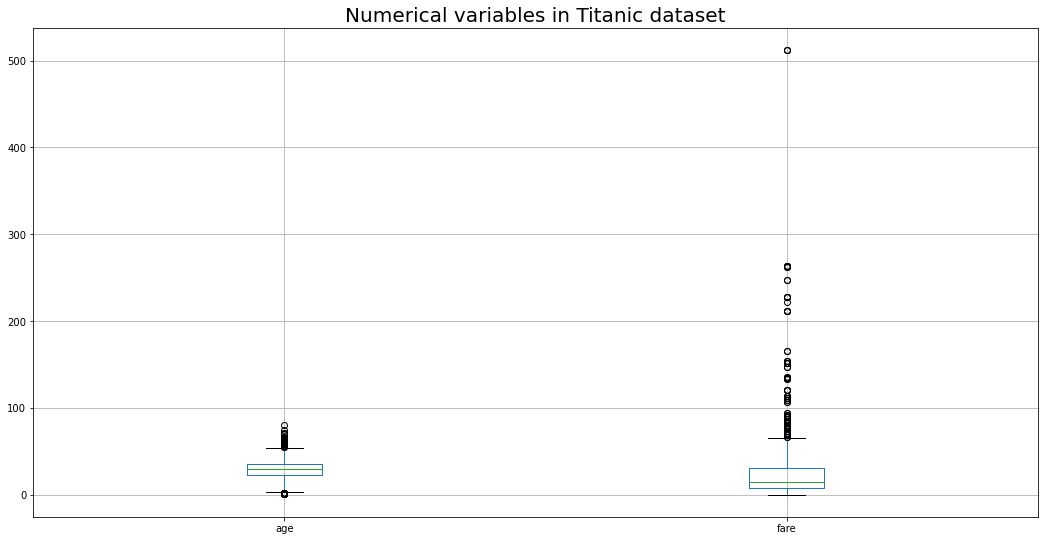

In [18]:
#Untuk mengetahui data pencilan
num_cols = ['age','fare']
plt.figure(figsize=(18,9))
data[num_cols].boxplot()
plt.title("Numerical variables in Titanic dataset", fontsize=20)
plt.show()

<AxesSubplot:xlabel='age'>

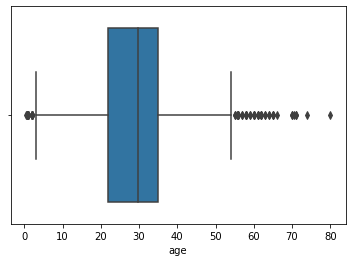

In [19]:
sns.boxplot(x=data['age'])

In [20]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

13.0


In [22]:
#Cara mengidentifikasi outlier 
# Persentil 90 untuk outlier nilai Upper Value
# Persentil 10 untuk outlier nilai lower value
np.percentile(data.age,[90])

array([47.])

In [23]:
uv = np.percentile(data.age,[90])[0]
uv

47.0

In [24]:
data[(data.age)>uv]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,C,Southampton,yes,True
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,B,Southampton,no,True
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,1,1,female,62.0,0,0,80.0000,S,First,woman,False,B,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,C,Southampton,no,True
857,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True


In [25]:
data.age[(data.age)>uv]=uv

/var/folders/zs/b4sprz055_n3psl6l74kw2wc0000gp/T/ipykernel_92040/553729963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[(data.age)>uv]=uv


<AxesSubplot:xlabel='age'>

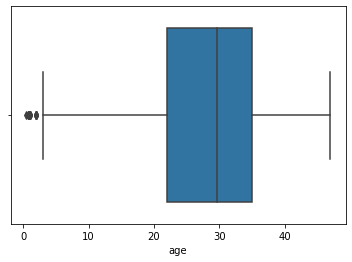

In [26]:
sns.boxplot(x=data['age'])

In [27]:
np.percentile(data.age,[10])

array([16.])

In [28]:
lv = np.percentile(data.age,[10])[0]

In [29]:
data[(data.age)<lv]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,E,Southampton,no,False
9,1,2,female,14.00,1,0,30.0708,C,Second,child,False,E,Cherbourg,yes,False
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.00,0,0,7.8542,S,Third,child,False,C,Southampton,no,True
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,B,Southampton,yes,False
850,0,3,male,4.00,4,2,31.2750,S,Third,child,False,C,Southampton,no,False
852,0,3,female,9.00,1,1,15.2458,C,Third,child,False,C,Cherbourg,no,False
869,1,3,male,4.00,1,1,11.1333,S,Third,child,False,A,Southampton,yes,False


In [30]:
data.age[(data.age)<lv]=lv

/var/folders/zs/b4sprz055_n3psl6l74kw2wc0000gp/T/ipykernel_92040/1930509128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[(data.age)<lv]=lv


<AxesSubplot:xlabel='age'>

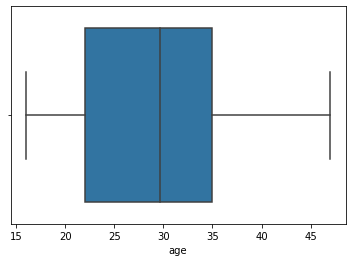

In [31]:
sns.boxplot(x=data['age'])

In [32]:
data['age'].mean()

29.697243348517794

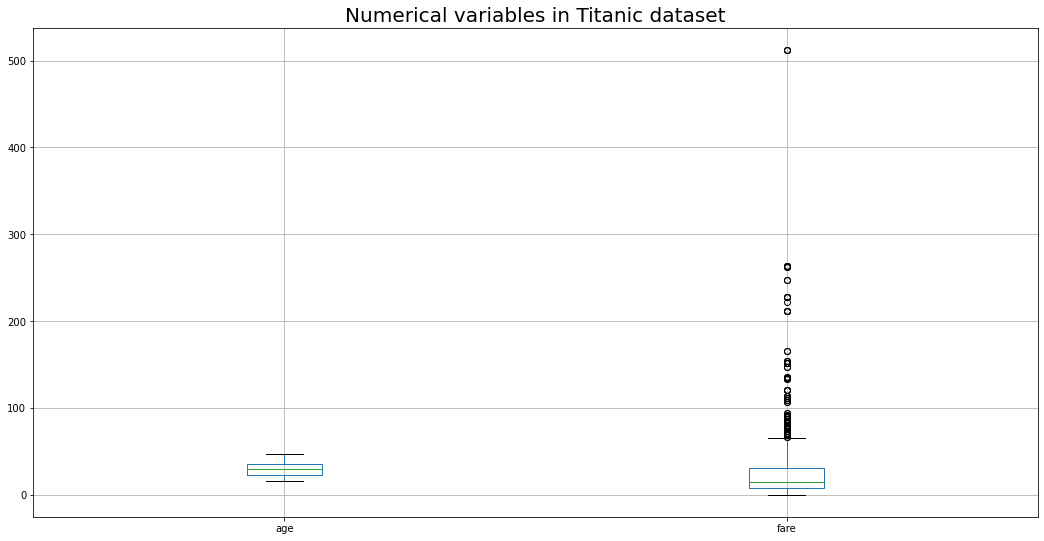

In [33]:
num_cols = ['age','fare']
plt.figure(figsize=(18,9))
data[num_cols].boxplot()
plt.title("Numerical variables in Titanic dataset", fontsize=20)
plt.show()

# Correlation

Korelasi digunakan untuk mengukur hubungan linear dua peubah acak. Misalkan X dan Y adalah dua peubah acak, maka korelasi antara X dan Y dinyatakan dengan

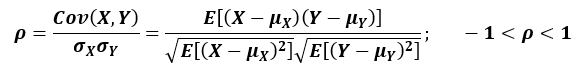

* Jika nilai korelasi mendekati 1 maka hubungan kedua peubah acak "sangat erat" dan searah
* Jika nilai korelasi sama dengan nol berarti tidak terdapat hubungan linear antara kedua peubah acak.
* Jika nilai korelasi mendekati -1 maka hubungan kedua peubah acak "sangat erat" dan berlawanan arah

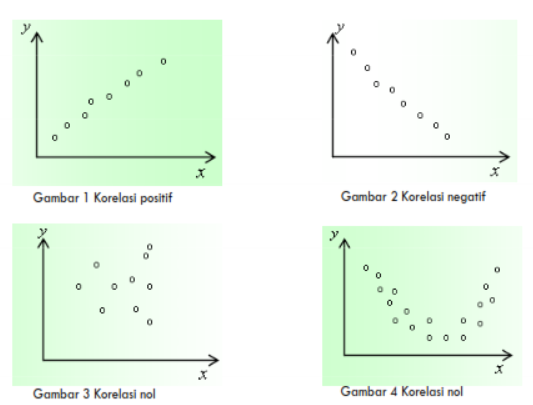

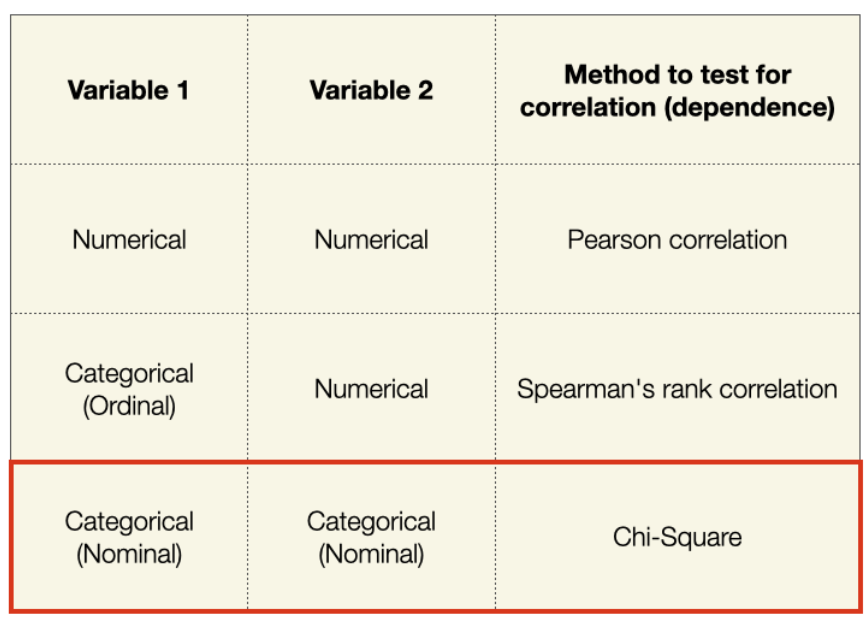

In [32]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,G,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [33]:
data_column_category = data.select_dtypes(exclude=[np.number]).columns 
data_column_category

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [34]:
data[data_column_category].head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,G,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,C,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,C,Southampton,no,True


In [35]:
#Data nominal
#data.sex.replace({"male":1,"female":0}, inplace=True)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in data_column_category :
    data[i] = label_encoder.fit_transform(data[i])
    print ('Label Encoded Data:')
data.head()

Label Encoded Data:
Label Encoded Data:
Label Encoded Data:
Label Encoded Data:
Label Encoded Data:
Label Encoded Data:
Label Encoded Data:
Label Encoded Data:
Label Encoded Data:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,6,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,2,0,1


In [36]:
#Correlation
np.corrcoef(data['age'], data['fare'])

array([[1.        , 0.10196937],
       [0.10196937, 1.        ]])

In [37]:
data.corr()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.036746,-0.035322,0.081629,0.257307,-0.167675,-0.338481,0.325753,-0.557080,-0.006833,-0.167675,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.335505,0.083081,0.018443,-0.549500,0.162098,1.000000,-0.196793,0.094035,0.104514,0.162098,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.067283,-0.114631,-0.245489,-0.182333,0.108262,0.131900,-0.639773,0.908578,0.000002,0.108262,-0.543351,0.303646
age,-0.036746,-0.335505,0.067283,1.000000,-0.185560,-0.119114,0.101969,-0.019414,-0.335505,0.290670,0.198542,0.010140,-0.019414,-0.036746,0.115803
sibsp,-0.035322,0.083081,-0.114631,-0.185560,1.000000,0.414838,0.159651,0.068230,0.083081,-0.136003,-0.253586,-0.019474,0.068230,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.119114,0.414838,1.000000,0.216225,0.039798,0.018443,-0.055682,-0.349943,-0.031340,0.039798,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.101969,0.159651,0.216225,1.000000,-0.224719,-0.549500,0.146290,-0.182024,-0.115866,-0.224719,0.257307,-0.271832
embarked,-0.167675,0.162098,0.108262,-0.019414,0.068230,0.039798,-0.224719,1.000000,0.162098,-0.064154,0.092526,0.105055,1.000000,-0.167675,0.063532
class,-0.338481,1.000000,0.131900,-0.335505,0.083081,0.018443,-0.549500,0.162098,1.000000,-0.196793,0.094035,0.104514,0.162098,-0.338481,0.135207
who,0.325753,-0.196793,-0.639773,0.290670,-0.136003,-0.055682,0.146290,-0.064154,-0.196793,1.000000,-0.437532,0.021385,-0.064154,0.325753,0.006540


In [38]:
from scipy.stats.stats import pearsonr

pearsonr(data['age'], data['fare'])

#p-value = 0.002 < 0.05

(0.10196937139787418, 0.0023081426206038036)

In [39]:
def chi2_by_hand(data, col1, col2):    
    #---create the contingency table---
    data_cont = pd.crosstab(index = data[col1], columns = data[col2])
    display(data_cont)
    #---calculate degree of freedom---
    degree_f = (data_cont.shape[0]-1) * (data_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    data_cont.loc[:,'Total']= data_cont.sum(axis=1)
    data_cont.loc['Total']= data_cont.sum()
    print('---Observed (O)---')
    display(data_cont)
    #---create the expected value dataframe---
    data_exp = data_cont.copy()    
    data_exp.iloc[:,:] = np.multiply.outer(
        data_cont.sum(1).values,data_cont.sum().values) / data_cont.sum().sum()            
    print('---Expected (E)---')
    display(data_exp)
        
    # calculate chi-square values
    data_chi2 = ((data_cont - data_exp)**2) / data_exp    
    data_chi2.loc[:,'Total']= data_chi2.sum(axis=1)
    data_chi2.loc['Total']= data_chi2.sum()
    
    print('---Chi-Square---')
    display(data_chi2)
    #---get chi-square score---   
    chi_square_score = data_chi2.iloc[:-1,:-1].sum().sum()
    
     #---calculate the p-value---
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    return chi_square_score, degree_f, p


In [40]:
chi_score, degree_f, p = chi2_by_hand(data,'sex','survived')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f},  p-value: {p}')

survived,0,1
sex,,
0,81,233
1,468,109


---Observed (O)---


survived,0,1,Total
sex,,,
0,81,233,314
1,468,109,577
Total,549,342,891


---Expected (E)---


survived,0,1,Total
sex,,,
0,193.474747,120.525253,314.0
1,355.525253,221.474747,577.0
Total,549.000000,342.000000,891.0


---Chi-Square---


survived,0,1,Total
sex,,,
0,65.386150,104.961977,170.348127
1,35.582757,57.119690,92.702447
Total,100.968907,162.081667,263.050574


Chi2_score: 263.05057407065567, Degrees of freedom: 1,  p-value: 3.711747770113424e-59
